In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [60]:
df = pd.read_csv('titanic_data.csv')

In [61]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
# to fill the missing value
m = df['Age'].mean()
df['Age'] = df['Age'].fillna(m)

In [67]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
rm = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
df.drop(rm, axis=1,inplace=True)

In [69]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,29.699118,0,0,Q
6,0,1,male,54.000000,0,0,S
7,0,3,male,2.000000,3,1,S
8,1,3,female,27.000000,0,2,S
9,1,2,female,14.000000,1,0,C


In [70]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [71]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
df['Embarked'] = df['Embarked'].fillna('S')

In [73]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# EDA

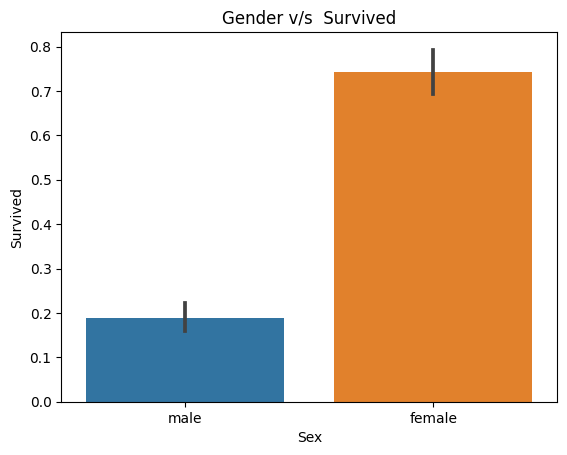

In [74]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Gender v/s  Survived')
plt.show()

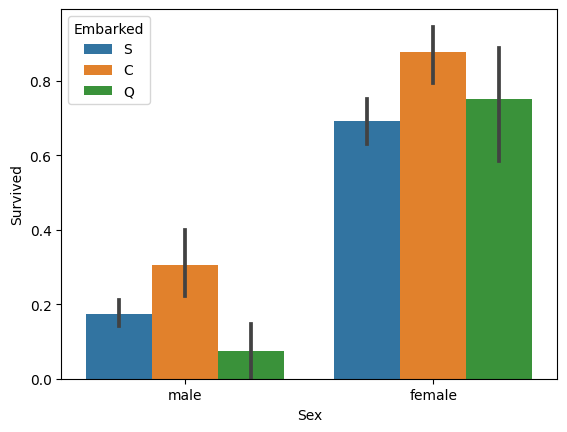

In [75]:
sns.barplot(x='Sex',y='Survived',hue='Embarked',data=df)
plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

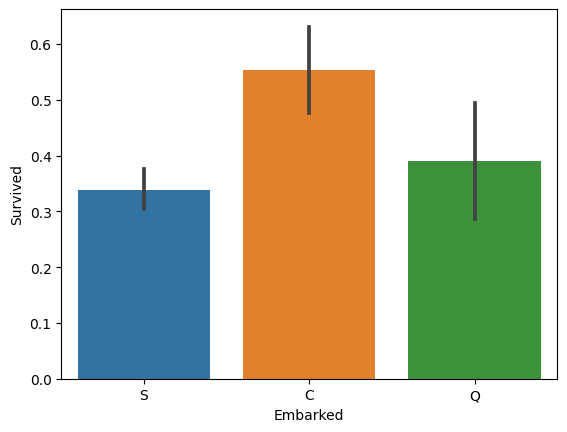

In [76]:
sns.barplot(x='Embarked',y='Survived',data=df)


<Axes: xlabel='Pclass', ylabel='Survived'>

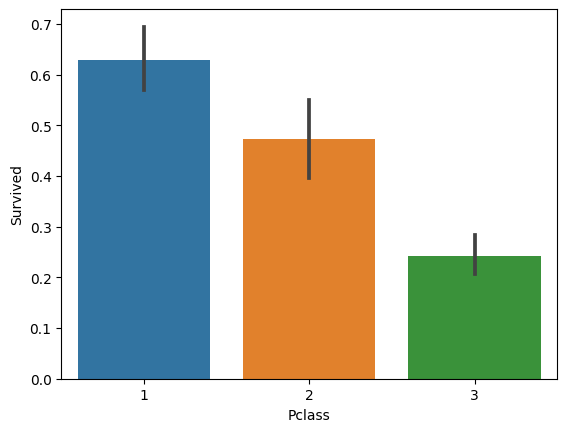

In [77]:
sns.barplot(x='Pclass',y='Survived',data=df)


In [78]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

<Axes: xlabel='Parch', ylabel='Survived'>

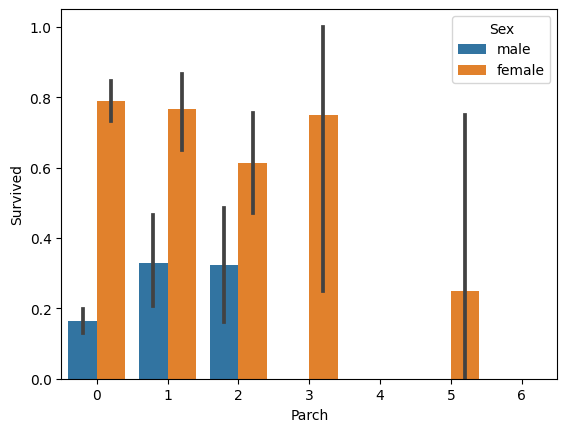

In [79]:
sns.barplot(x='Parch',y='Survived',hue='Sex',data=df)


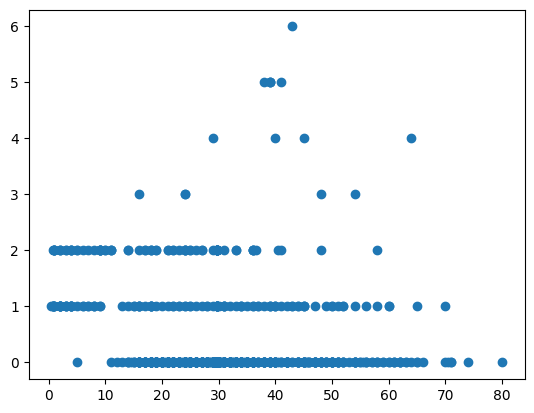

In [80]:
plt.scatter(df['Age'],df['Parch'])

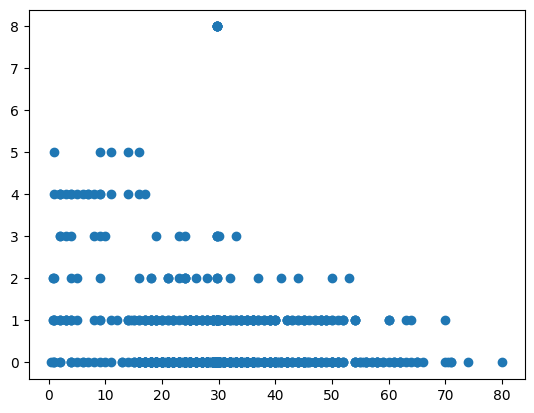

In [81]:
plt.scatter(df['Age'],df['SibSp'])

In [82]:
# to change the categorical into numerical form
def fun(a):
    if(a=='male'):
        return 0
    else:
        return 1
df['Sex'] = df['Sex'].apply(fun)

In [83]:
# change the categorical into numberical form
def fun(a):
    if(a =='S'):
        return 0
    elif(a =='C'):
        return 1
    else:
        return 2
df['Embarked'] = df['Embarked'].map(fun)

In [84]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


<Axes: >

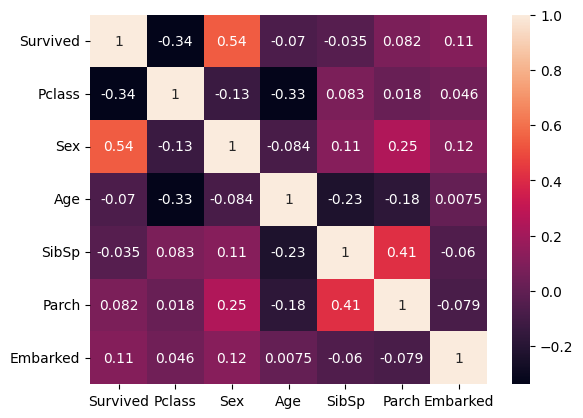

In [85]:
sns.heatmap(df.corr(),annot=True)

#  splitting data

In [86]:
x =df.drop('Survived',axis=1)
y = df['Survived']

In [90]:
# splitting into training nad testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

# Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#  Classification

In [94]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [95]:
logreg.fit(x_train, y_train)
svc_classifier.fit(x_train, y_train)
dt_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [96]:
logreg_ypred = logreg.predict(x_test)
svc_classifier_ypred = svc_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
knn_classifier_ypred = knn_classifier.predict(x_test)
rf_classifier_ypred = rf_classifier.predict(x_test)

# finding accuracy


In [100]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, logreg_ypred)
svc_classifier_acc = accuracy_score(y_test, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(y_test, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(y_test, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(y_test, rf_classifier_ypred)

In [101]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  76.49
Support Vector      :  82.09
Decision Tree       :  77.24
K-NN Classifier     :  76.49
Random Forest       :  78.73
